In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as lgr
from warnings import simplefilter

In [41]:
data = pd.read_csv('Datasets/diabetes.csv')

In [42]:
data.shape

(768, 9)

In [43]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Pearson method 
## sum((x - xmean)*(y - ymean))/sqrt(sum((x - xmean)^2)) * sqrt(sum((y - ymean))^2)


In [45]:
x = data['Pregnancies']
y = data['BloodPressure']
xmean = x.mean()
ymean = y.mean()
a = x - xmean
b = y-ymean
n = sum(a*b)
a1 = np.sqrt(sum(a*a))
a2 = np.sqrt(sum(b*b))
d = a1*a2
c = n/d

In [46]:
c

0.1412819774071402

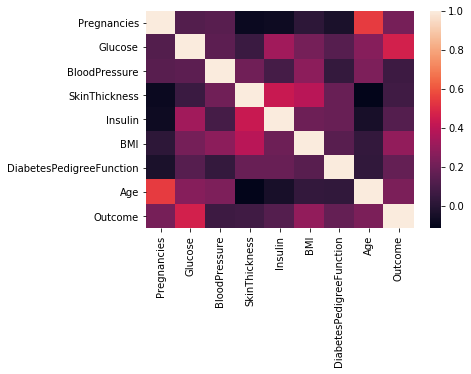

In [47]:
sns.heatmap(corr,xticklabels=data.columns,yticklabels=data.columns)
plt.show()

In [48]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [49]:
xtrain, xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)

In [50]:
xtrain.shape

(614, 8)

In [51]:
xtest.shape

(154, 8)

In [52]:
ytest.shape

(154,)

In [53]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
419,3,129,64,29,115,26.4,0.219,28
12,10,139,80,0,0,27.1,1.441,57
411,1,112,72,30,176,34.4,0.528,25
583,8,100,76,0,0,38.7,0.190,42
471,0,137,70,38,0,33.2,0.170,22
...,...,...,...,...,...,...,...,...
588,3,176,86,27,156,33.3,1.154,52
66,0,109,88,30,0,32.5,0.855,38
718,1,108,60,46,178,35.5,0.415,24
337,5,115,76,0,0,31.2,0.343,44


In [54]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [55]:
xtrain

array([[0.17647059, 0.64824121, 0.52459016, ..., 0.39344262, 0.06020495,
        0.11666667],
       [0.58823529, 0.69849246, 0.6557377 , ..., 0.40387481, 0.58198121,
        0.6       ],
       [0.05882353, 0.56281407, 0.59016393, ..., 0.51266766, 0.19214347,
        0.06666667],
       ...,
       [0.05882353, 0.54271357, 0.49180328, ..., 0.5290611 , 0.14389411,
        0.05      ],
       [0.29411765, 0.57788945, 0.62295082, ..., 0.46497765, 0.11315115,
        0.38333333],
       [0.29411765, 0.77889447, 0.68852459, ..., 0.57675112, 0.23099915,
        0.21666667]])

In [56]:
simplefilter("ignore",category=FutureWarning)  #removes warning
MB = lgr()
Machine_train = MB.fit(xtrain,ytrain)

In [57]:
ypred_train = MB.predict(xtrain)

In [58]:
ypred_test = MB.predict(xtest)

In [59]:
acc_test = MB.score(xtest,ytest)*100
acc_train = MB.score(xtrain,ytrain)*100

In [60]:
print("Accuracy by training Data",acc_train)
print("Accuracy by testing Data",acc_test)

Accuracy by training Data 77.0358306188925
Accuracy by testing Data 78.57142857142857


In [61]:
newdata = [2,85,60,0.2,1.0,0.19,0.01,50]
MB.predict([newdata])

array([1], dtype=int64)

In [62]:
MB.predict_proba([newdata])

array([[0., 1.]])

In [63]:
coeff = MB.coef_

In [64]:
importance = coeff[0]

In [65]:
df = pd.DataFrame()


In [66]:
importance

array([ 1.91259969,  4.48666272, -0.69243833,  0.15190906, -0.19893868,
        3.05775654,  1.66682483,  0.80747321])

In [78]:
df['features'] = X.columns
df['importance'] = importance
df['Positive'] = df['importance'] > 0

In [79]:
df

,features,importance,Postive,Positive
0,Pregnancies,1.912600,True,True
1,Glucose,4.486663,True,True
2,BloodPressure,-0.692438,False,False
3,SkinThickness,0.151909,True,True
4,Insulin,-0.198939,False,False
5,BMI,3.057757,True,True
6,DiabetesPedigreeFunction,1.666825,True,True
7,Age,0.807473,True,True


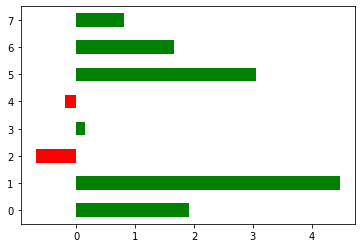

In [80]:
colors = df['Positive'].map({True:"green", False:"red"})
df['importance'].plot(kind = 'barh',color = colors)
plt.show()